Stock Market Prediction And Forcasting Using Stacked LSTM

In [52]:
#data collection
import pandas_datareader as pdr

In [53]:
key='f3ff05c0f92d7c7a2a74140af084b04e76509417'

In [54]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [55]:
df.to_csv('AAPL.csv')

In [56]:
import pandas as pd

In [57]:
df.head()

close    high  ...  divCash  splitFactor
symbol date                                        ...                      
AAPL   2017-02-13 00:00:00+00:00  133.290  133.82  ...      0.0          1.0
       2017-02-14 00:00:00+00:00  135.020  135.09  ...      0.0          1.0
       2017-02-15 00:00:00+00:00  135.510  136.27  ...      0.0          1.0
       2017-02-16 00:00:00+00:00  135.345  135.90  ...      0.0          1.0
       2017-02-17 00:00:00+00:00  135.720  135.83  ...      0.0          1.0

[5 rows x 12 columns]

In [58]:
df.tail()

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
AAPL   2022-02-03 00:00:00+00:00  172.90  176.2399  ...     0.00          1.0
       2022-02-04 00:00:00+00:00  172.39  174.1000  ...     0.22          1.0
       2022-02-07 00:00:00+00:00  171.66  173.9458  ...     0.00          1.0
       2022-02-08 00:00:00+00:00  174.83  175.3500  ...     0.00          1.0
       2022-02-09 00:00:00+00:00  176.28  176.6500  ...     0.00          1.0

[5 rows x 12 columns]

In [59]:
df1=df.reset_index()['close']

In [60]:
df1.head()

0    133.290
1    135.020
2    135.510
3    135.345
4    135.720
Name: close, dtype: float64

In [61]:
df1.shape

(1258,)

In [62]:
import matplotlib.pyplot as plt


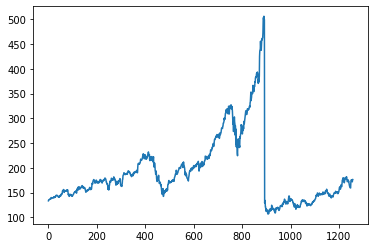

In [63]:
plt.plot(df1)

In [64]:
## LSTM are sencetive for scalable data, so we use min-max scalar

In [65]:
import numpy as np

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(df1).reshape(-1,1))

In [68]:
df1.shape

(1258, 1)

In [69]:
df1

array([[0.06624922],
       [0.07058234],
       [0.07180964],
       ...,
       [0.16235441],
       [0.1702943 ],
       [0.17392611]])

In [70]:
#splitting the data set into train and test

In [71]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [72]:
training_size,test_size

(817, 441)

In [73]:
train_data.shape,test_data.shape

((817, 1), (441, 1))

In [79]:
train_data

array([[0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.088

In [104]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [105]:
#reshape into X=t, t+1, t+2, t+3 and y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [106]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [107]:
print(X_train.shape),print(y_train.shape),print(X_test.shape),print(y_test.shape)

(716, 100)
(716,)
(340, 100)
(340,)


(None, None, None, None)

In [108]:
#reshape input to be [sample,time_steps,features] which is required for lstm
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [111]:
###creating the stack lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [113]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add((Dense(1)))
model.compile(loss="mean_squared_error",optimizer='adam')

In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 21s 638ms/step - loss: 0.0152 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 5s 455ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 4s 358ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 4/100
12/12 [==============================] - 4s 367ms/step - loss: 0.0011 - val_loss: 2.5488e-04
Epoch 5/100
12/12 [==============================] - 4s 367ms/step - loss: 0.0011 - val_loss: 2.3360e-04
Epoch 6/100
12/12 [==============================] - 4s 366ms/step - loss: 8.8017e-04 - val_loss: 2.5245e-04
Epoch 7/100
12/12 [==============================] - 4s 377ms/step - loss: 8.3989e-04 - val_loss: 3.7628e-04
Epoch 8/100
12/12 [==============================] - 4s 363ms/step - loss: 7.8363e-04 - val_loss: 3.1946e-04
Epoch 9/100
12/12 [==============================] - 4s 362ms/step - loss: 7.7096e-04 - val_loss: 3.3620e-04
Epoch 10/100
12/12 [==============================

In [116]:
#lets do the prediction and check performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [118]:
#transform back to original from
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [120]:
#calculate RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

208.87276972548906

In [121]:
# test rmse performance
math.sqrt(mean_squared_error(y_test,test_predict))

141.9885235177454

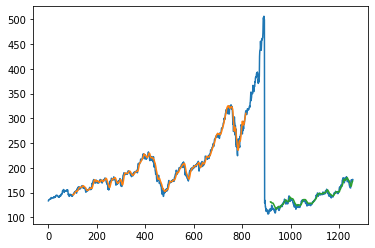

In [123]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [124]:
len(test_data)


441

In [125]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [126]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [127]:
temp_input


[0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265497809,
 0.12781465247338758,
 0.13452723857232307,
 0.13570444583

In [128]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16985561]
101
1 day input [0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0.10810269 0.11060739 0.11684408
 0.12781465 0.13452724 0.13570445 0.13668128 0.13800877 0.12515967
 0.13375078 0.14642455 0.14509706 0.14256731 0.1377583  0.14647464
 0.16115216 0.17092048 0.16961803 0.181866   0.17257358 0.16904195
 0.18149029 0.16385723 0.16105197 0.15757044 0.16568566 0.17232311
 0.17392611 0.18407013 0.18146525 0.18169067 0.17873513 0.17715717
 0.18827802 0.18249217 0.17051972 0.16320601 0.16363181 0.1636819
 0.17092048 0.17204759 0.1636819  0.16588604 0.15769568 0.14875391
 0.14444584 0.13918597 0.13720726 0.

In [129]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [130]:
import matplotlib.pyplot as plt

In [131]:
len(df1)


1258

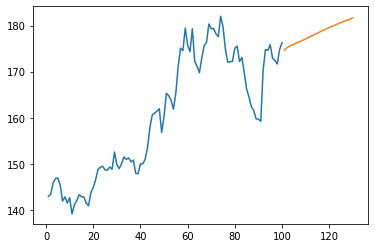

In [132]:
plt.plot(day_new,scalar.inverse_transform(df1[1158:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

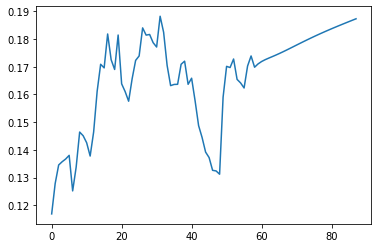

In [133]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [135]:
df3=scalar.inverse_transform(df3).tolist()


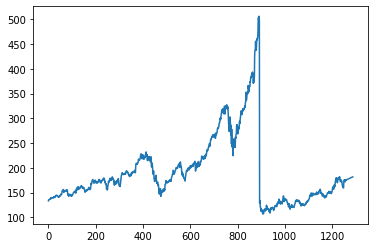

In [136]:
plt.plot(df3)
